# Introduction

### The goal of the specific project for GEOG414 is to identify changes in commercial offering before and after the implementation of bike infrastructures in Montréal

- Create my own classification of business characteristics based on the ones provided in the original data 
- Create a dendrogram heatmap to visualize commercial offering based on the proximity of the classified businesses to each other 
    - Colocation patterns ; which categories of stores are more likely to co-locate 
    - Would co-location pattern change throughout the years (2015, 2016, 2017, 2018, 2019, 2020) 
    - ( not to be answered in this report ) Would co-location pattern change with the implementation of a bike infrastructure? 
    - ( not to be answered in this report ) What is the statistical significance of co-location and bike infrastructure? 

# Catographic model

In [53]:
from IPython.display import SVG, display

# Specify the path to your SVG file
svg_path = 'GEOG414_Final_Project_diagram2.drawio.svg'

# Display the SVG file
display(SVG(filename=svg_path))

# A. Data used

In [55]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as pl
import json
import folium
import csv

In [2]:
df = pd.read_stata('ETABLISSEMENTS_COMMERCE_DETAIL_RESTAURATION_GEOCODE_AQ_ARCGIS_1996_2020.dta') 
df.head()

,oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,aq_city,...,role_nbchambre,role_nblocaux,role_valterre,role_valbati,role_valimmeuble,role_anrole,role_nb,role_superficie_n,role_supetage_n,cod_intval_emplo_que
0,76102,A,"785 10e Avenue, Montréal, H8S 3G1",785 10e Avenue,"785 10e Avenue, Montréal, H8S 3G1",20,785.0,10e Avenue,785 10e Avenue,Montréal,...,0.0,0.0,90900.0,280800.0,371700.0,2018.0,2240218.0,221.800003,206.800003,O
1,70486,A,"624 19e Avenue, Montréal, H8S 3S7",624 19e Avenue,"624 19e Avenue, Montréal, H8S 3S7",20,624.0,19e Avenue,624 19e Avenue,Montréal,...,0.0,0.0,154100.0,289200.0,443300.0,2018.0,2226862.0,375.799988,192.399994,O
2,472321,A,"3375 Félicité, Laval, H7P 1M7",3375 Félicité,"3375 Félicité, Laval, H7P 1M7",20,3375.0,Félicité,3375 Félicité,Laval,...,0.0,0.0,147100.0,117700.0,264800.0,2018.0,1898560.0,451.500000,80.300003,A
3,583676,A,"114 Chopin, Charlemagne, J5Z 4R5",114 Chopin,"114 Chopin, Charlemagne, J5Z 4R5",20,114.0,Chopin,114 Chopin,Charlemagne,...,0.0,0.0,21600.0,110200.0,131800.0,2018.0,1634066.0,102.529999,81.699997,A
4,502272,A,"5759 Grandes-Prairies, Montréal, H1R 1B3",5759 Grandes-Prairies,"5759 Grandes-Prairies, Montréal, H1R 1B3",20,5759.0,Grandes-Prairies,5759 Grandes-Prairies,Montréal,...,0.0,0.0,2752600.0,0.0,2752600.0,2018.0,2388807.0,9175.200195,0.000000,A


In [3]:
# Use filter to select columns containing 'arcgis'
arcgis_columns = df.filter(like='arcgis', axis=1)

# Drop the selected columns
df_aq = df.drop(arcgis_columns.columns, axis=1)
df_aq

,oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,aq_city,...,role_nbchambre,role_nblocaux,role_valterre,role_valbati,role_valimmeuble,role_anrole,role_nb,role_superficie_n,role_supetage_n,cod_intval_emplo_que
0,76102,A,"785 10e Avenue, Montréal, H8S 3G1",785 10e Avenue,"785 10e Avenue, Montréal, H8S 3G1",20,785.0,10e Avenue,785 10e Avenue,Montréal,...,0.0,0.0,90900.0,280800.0,371700.0,2018.0,2240218.0,221.800003,206.800003,O
1,70486,A,"624 19e Avenue, Montréal, H8S 3S7",624 19e Avenue,"624 19e Avenue, Montréal, H8S 3S7",20,624.0,19e Avenue,624 19e Avenue,Montréal,...,0.0,0.0,154100.0,289200.0,443300.0,2018.0,2226862.0,375.799988,192.399994,O
2,472321,A,"3375 Félicité, Laval, H7P 1M7",3375 Félicité,"3375 Félicité, Laval, H7P 1M7",20,3375.0,Félicité,3375 Félicité,Laval,...,0.0,0.0,147100.0,117700.0,264800.0,2018.0,1898560.0,451.500000,80.300003,A
3,583676,A,"114 Chopin, Charlemagne, J5Z 4R5",114 Chopin,"114 Chopin, Charlemagne, J5Z 4R5",20,114.0,Chopin,114 Chopin,Charlemagne,...,0.0,0.0,21600.0,110200.0,131800.0,2018.0,1634066.0,102.529999,81.699997,A
4,502272,A,"5759 Grandes-Prairies, Montréal, H1R 1B3",5759 Grandes-Prairies,"5759 Grandes-Prairies, Montréal, H1R 1B3",20,5759.0,Grandes-Prairies,5759 Grandes-Prairies,Montréal,...,0.0,0.0,2752600.0,0.0,2752600.0,2018.0,2388807.0,9175.200195,0.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569886,2460,A,"242 Fleuve, Coteau-du-Lac, J0P 1B0",242 Fleuve,"242 Fleuve, Coteau-du-Lac, J0P 1B0",20,242.0,Fleuve,242 Fleuve,Coteau-du-Lac,...,0.0,0.0,314700.0,394000.0,708700.0,2018.0,2762905.0,3485.100098,1369.900024,O
569887,2459,A,"242 Fleuve, Coteau-du-Lac, J0P 1B0",242 Fleuve,"242 Fleuve, Coteau-du-Lac, J0P 1B0",20,242.0,Fleuve,242 Fleuve,Coteau-du-Lac,...,0.0,0.0,314700.0,394000.0,708700.0,2018.0,2762905.0,3485.100098,1369.900024,O
569888,570706,A,"34 Sarah-Garth, Blainville, J7C 4W1",34 Sarah-Garth,"34 Sarah-Garth, Blainville, J7C 4W1",20,34.0,Sarah-Garth,34 Sarah-Garth,Blainville,...,0.0,0.0,68500.0,180300.0,248800.0,2018.0,2888001.0,544.000000,107.800003,O
569889,591134,A,"118 Adret, Saint-Colomban, J5K 2H4",118 Adret,"118 Adret, Saint-Colomban, J5K 2H4",20,118.0,Adret,118 Adret,Saint-Colomban,...,0.0,0.0,51100.0,231600.0,282700.0,2018.0,2946302.0,5361.000000,167.899994,O


In [4]:
df_montreal = df_aq[df_aq['aq_place_addr'].str.contains('Montréal', case=False, na=False)]
df_montreal

,oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,aq_city,...,role_nbchambre,role_nblocaux,role_valterre,role_valbati,role_valimmeuble,role_anrole,role_nb,role_superficie_n,role_supetage_n,cod_intval_emplo_que
0,76102,A,"785 10e Avenue, Montréal, H8S 3G1",785 10e Avenue,"785 10e Avenue, Montréal, H8S 3G1",20,785.0,10e Avenue,785 10e Avenue,Montréal,...,0.0,0.0,90900.0,280800.0,371700.0,2018.0,2240218.0,221.800003,206.800003,O
1,70486,A,"624 19e Avenue, Montréal, H8S 3S7",624 19e Avenue,"624 19e Avenue, Montréal, H8S 3S7",20,624.0,19e Avenue,624 19e Avenue,Montréal,...,0.0,0.0,154100.0,289200.0,443300.0,2018.0,2226862.0,375.799988,192.399994,O
4,502272,A,"5759 Grandes-Prairies, Montréal, H1R 1B3",5759 Grandes-Prairies,"5759 Grandes-Prairies, Montréal, H1R 1B3",20,5759.0,Grandes-Prairies,5759 Grandes-Prairies,Montréal,...,0.0,0.0,2752600.0,0.0,2752600.0,2018.0,2388807.0,9175.200195,0.000000,A
5,502271,A,"5759 Grandes-Prairies, Montréal, H1R 1B3",5759 Grandes-Prairies,"5759 Grandes-Prairies, Montréal, H1R 1B3",20,5759.0,Grandes-Prairies,5759 Grandes-Prairies,Montréal,...,0.0,0.0,2752600.0,0.0,2752600.0,2018.0,2388807.0,9175.200195,0.000000,A
6,490168,A,"7275 Sherbrooke, Montréal, H1N 1E9",7275 Sherbrooke,"7275 Sherbrooke, Montréal, H1N 1E9",20,7275.0,Sherbrooke,7275 Sherbrooke,Montréal,...,0.0,236.0,53069400.0,109930600.0,163000000.0,2018.0,2119987.0,168474.296875,83313.000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569879,88317,A,"18581 Antoine-Faucon, Montréal, H9K 1M7",18581 Antoine-Faucon,"18581 Antoine-Faucon, Montréal, H9K 1M7",20,18581.0,Antoine-Faucon,18581 Antoine-Faucon,Montréal,...,0.0,0.0,126200.0,226800.0,353000.0,2018.0,2160171.0,420.500000,143.899994,O
569881,405390,A,"9224 Olivier-Maurault, Montréal, H2M 2K1",9224 Olivier-Maurault,"9224 Olivier-Maurault, Montréal, H2M 2K1",20,9224.0,Olivier-Maurault,9224 Olivier-Maurault,Montréal,...,0.0,0.0,356500.0,450200.0,806700.0,2018.0,2283528.0,485.000000,299.200012,O
569882,405389,A,"9224 Olivier-Maurault, Montréal, H2M 2K1",9224 Olivier-Maurault,"9224 Olivier-Maurault, Montréal, H2M 2K1",20,9224.0,Olivier-Maurault,9224 Olivier-Maurault,Montréal,...,0.0,0.0,356500.0,450200.0,806700.0,2018.0,2283528.0,485.000000,299.200012,O
569883,374360,A,"12045 Bois-de-Boulogne, Montréal, H3M 2X8",12045 Bois-de-Boulogne,"12045 Bois-de-Boulogne, Montréal, H3M 2X8",20,12045.0,Bois-de-Boulogne,12045 Bois-de-Boulogne,Montréal,...,0.0,0.0,156800.0,300900.0,457700.0,2018.0,2222688.0,261.299988,241.899994,A


## Keeping the 2015-2020 timeframe by discarding dates that does not cover the 2015 to 2020 timeframe

In [20]:
import pandas as pd

# Convert date columns to datetime objects
df_montreal['dat_initl_declr'] = pd.to_datetime(df_montreal['dat_initl_declr'], format='%d%b%Y %H:%M:%S')
df_montreal['dat_final_declr'] = pd.to_datetime(df_montreal['dat_final_declr'], format='%d%b%Y %H:%M:%S')

# # Filter rows based on the ending date condition
year_threshold = 2015
df_2015_2018 = df_montreal[df_montreal['dat_final_declr'].dt.year >= year_threshold]

#filtered_df.to_csv('MAIN_Cleaned_AQ_2015_to_2020_12_04.csv', index=False)

C:\Users\Jia.YiYu\AppData\Local\Temp\ipykernel_12316\523225125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_montreal['dat_initl_declr'] = pd.to_datetime(df_montreal['dat_initl_declr'], format='%d%b%Y %H:%M:%S')
C:\Users\Jia.YiYu\AppData\Local\Temp\ipykernel_12316\523225125.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_montreal['dat_final_declr'] = pd.to_datetime(df_montreal['dat_final_declr'], format='%d%b%Y %H:%M:%S')


# Part 2 Data Manipulation

In [26]:
df = pd.read_csv('to_group_11_29_23.csv', encoding = 'UTF-8-SIG')
# Define a function to replace 'ÃƒÂ©' with 'é'
def replace_special_chars(value):
    return str(value).replace('ÃƒÂ©', 'é')


# Apply the function to each cell in the DataFrame
df = df.applymap(replace_special_chars)
df

C:\Users\Jia.YiYu\AppData\Local\Temp\ipykernel_13748\797926280.py:1: DtypeWarning: Columns (52,53,54,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('to_group_11_29_23.csv', encoding = 'UTF-8-SIG')


,oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,aq_city,...,role_nbchambre,role_nblocaux,role_valterre,role_valbati,role_valimmeuble,role_anrole,role_nb,role_superficie_n,role_supetage_n,cod_intval_emplo_que
0,381567,A,"9515 Saint-Laurent, Montréal, H2N 1P6",9515 Saint-Laurent,"9515 Saint-Laurent, Montréal, H2N 1P6",20,9515,Saint-Laurent,9515 Saint-Laurent,Montréal,...,0,1,684200.0,188000.0,872200.0,2018,2263553,1800.6,133.4,A
1,381566,A,"9515 Saint-Laurent, Montréal, H2N 1P6",9515 Saint-Laurent,"9515 Saint-Laurent, Montréal, H2N 1P6",20,9515,Saint-Laurent,9515 Saint-Laurent,Montréal,...,0,1,684200.0,188000.0,872200.0,2018,2263553,1800.6,133.4,A
2,190679,A,"1260 Crescent, Montréal, H3G 2A9",1260 Crescent,"1260 Crescent, Montréal, H3G 2A9",20,1260,Crescent,1260 Crescent,Montréal,...,0,2,1308400.0,757500.0,2065900.0,2018,2449489,527.6,1575.3,A
3,532086,A,"7450 Maurice-Duplessis, Montréal, H1E 3Y1",7450 Maurice-Duplessis,"7450 Maurice-Duplessis, Montréal, H1E 3Y1",20,7450,Maurice-Duplessis,7450 Maurice-Duplessis,Montréal,...,0,2,142100.0,417500.0,559600.0,2018,2427640,592.0,481.2,O
4,532150,A,"7454 Maurice-Duplessis, Montréal, H1E 3Y1",7454 Maurice-Duplessis,"7454 Maurice-Duplessis, Montréal, H1E 3Y1",20,7454,Maurice-Duplessis,7454 Maurice-Duplessis,Montréal,...,0,1,142400.0,352300.0,494700.0,2018,2427641,593.5,362.4,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43895,271085,A,"4174 Saint-Dominique, Montréal, H2W 2A8",4174 Saint-Dominique,"4174 Saint-Dominique, Montréal, H2W 2A8",20,4174,Saint-Dominique,4174 Saint-Dominique,Montréal,...,0,0,404700.0,945300.0,1350000.0,2018,2455465,292.0,635.2,O
43896,271084,A,"4174 Saint-Dominique, Montréal, H2W 2A8",4174 Saint-Dominique,"4174 Saint-Dominique, Montréal, H2W 2A8",20,4174,Saint-Dominique,4174 Saint-Dominique,Montréal,...,0,0,404700.0,945300.0,1350000.0,2018,2455465,292.0,635.2,O
43897,493317,A,"2029 Liébert, Montréal, H1L 5P8",2029 Liébert,"2029 Liébert, Montréal, H1L 5P8",20,2029,Liébert,2029 Liébert,Montréal,...,0,0,78000.0,360200.0,438200.0,2018,2136229,179.4,329.3,O
43898,516683,A,"6301 Roi-René, Montréal, H1K 3G4",6301 Roi-René,"6301 Roi-René, Montréal, H1K 3G4",20,6301,Roi-René,6301 Roi-René,Montréal,...,0,0,195700.0,564300.0,760000.0,2018,2121960,444.7,467.7,O


In [28]:
# copying the original dataframe to a clean one
df_clean = df.copy()

# applying the fillna to fill null values from another column
df_clean['cae_description'] = df_clean['cae_description'].fillna(df_clean['cae_famille'])
df_clean

,oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,aq_city,...,role_nbchambre,role_nblocaux,role_valterre,role_valbati,role_valimmeuble,role_anrole,role_nb,role_superficie_n,role_supetage_n,cod_intval_emplo_que
0,381567,A,"9515 Saint-Laurent, Montréal, H2N 1P6",9515 Saint-Laurent,"9515 Saint-Laurent, Montréal, H2N 1P6",20,9515,Saint-Laurent,9515 Saint-Laurent,Montréal,...,0,1,684200.0,188000.0,872200.0,2018,2263553,1800.6,133.4,A
1,381566,A,"9515 Saint-Laurent, Montréal, H2N 1P6",9515 Saint-Laurent,"9515 Saint-Laurent, Montréal, H2N 1P6",20,9515,Saint-Laurent,9515 Saint-Laurent,Montréal,...,0,1,684200.0,188000.0,872200.0,2018,2263553,1800.6,133.4,A
2,190679,A,"1260 Crescent, Montréal, H3G 2A9",1260 Crescent,"1260 Crescent, Montréal, H3G 2A9",20,1260,Crescent,1260 Crescent,Montréal,...,0,2,1308400.0,757500.0,2065900.0,2018,2449489,527.6,1575.3,A
3,532086,A,"7450 Maurice-Duplessis, Montréal, H1E 3Y1",7450 Maurice-Duplessis,"7450 Maurice-Duplessis, Montréal, H1E 3Y1",20,7450,Maurice-Duplessis,7450 Maurice-Duplessis,Montréal,...,0,2,142100.0,417500.0,559600.0,2018,2427640,592.0,481.2,O
4,532150,A,"7454 Maurice-Duplessis, Montréal, H1E 3Y1",7454 Maurice-Duplessis,"7454 Maurice-Duplessis, Montréal, H1E 3Y1",20,7454,Maurice-Duplessis,7454 Maurice-Duplessis,Montréal,...,0,1,142400.0,352300.0,494700.0,2018,2427641,593.5,362.4,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43895,271085,A,"4174 Saint-Dominique, Montréal, H2W 2A8",4174 Saint-Dominique,"4174 Saint-Dominique, Montréal, H2W 2A8",20,4174,Saint-Dominique,4174 Saint-Dominique,Montréal,...,0,0,404700.0,945300.0,1350000.0,2018,2455465,292.0,635.2,O
43896,271084,A,"4174 Saint-Dominique, Montréal, H2W 2A8",4174 Saint-Dominique,"4174 Saint-Dominique, Montréal, H2W 2A8",20,4174,Saint-Dominique,4174 Saint-Dominique,Montréal,...,0,0,404700.0,945300.0,1350000.0,2018,2455465,292.0,635.2,O
43897,493317,A,"2029 Liébert, Montréal, H1L 5P8",2029 Liébert,"2029 Liébert, Montréal, H1L 5P8",20,2029,Liébert,2029 Liébert,Montréal,...,0,0,78000.0,360200.0,438200.0,2018,2136229,179.4,329.3,O
43898,516683,A,"6301 Roi-René, Montréal, H1K 3G4",6301 Roi-René,"6301 Roi-René, Montréal, H1K 3G4",20,6301,Roi-René,6301 Roi-René,Montréal,...,0,0,195700.0,564300.0,760000.0,2018,2121960,444.7,467.7,O


In [40]:
# Define a function to replace characters in the 'cae_description' column
def replace_special_chars(description):
    # Replace 'ÃƒÆ’Ã‚Â¢' with 'â'
    description = description.replace('ÃƒÆ’Ã‚Â¢', 'â')
    # Replace 'ÃƒÆ’Ã‚Â©' with 'é'
    description = description.replace('ÃƒÆ’Ã‚Â©', 'é')
    # Replace 'vÃƒÆ’Ã‚Âª' with 'ê'
    description = description.replace('vÃƒÆ’Ã‚Âª', 'ê')
     # Replace 'ÃƒÆ’Ã‚Âª' with 'ê'
    description = description.replace('ÃƒÆ’Ã‚Âª', 'ê')
    # Replace 'ÃƒÆ’Ã¢â‚¬Â°' with 'é'
    description = description.replace('ÃƒÆ’Ã¢â‚¬Â°', 'é')
    # Replace 'ÃƒÆ’Ã‚Â¨' with 'è'
    description = description.replace('ÃƒÆ’Ã‚Â¨', 'è')
    # Replace 'ÃƒÆ’Ã‚Â´' with 'ô'
    description = description.replace('ÃƒÆ’Ã‚Â´', 'ô')
    # Replace 'ÃƒÆ’Ã‚Â§' with 'ç'
    description = description.replace('ÃƒÆ’Ã‚Â§', 'ç')
     # Replace 'ÃƒÆ’Ã‚Â®' with 'î'
    description = description.replace('ÃƒÆ’Ã‚Â®', 'î')
    # Replace 'ÃƒÆ’Ã‚Â ' with 'à'
    description = description.replace('ÃƒÆ’Ã‚Â ', 'à')
    
    return description

# Apply the function to the 'cae_description' column
df_clean['cae_description'] = df_clean['cae_description'].apply(replace_special_chars)

C:\Users\Jia.YiYu\AppData\Local\Temp\ipykernel_13748\1191914423.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cae_description'] = df_clean['cae_description'].apply(replace_special_chars)


In [41]:
# Drop rows where 'cae_description' is equal to the string 'NaN'
df_clean = df_clean[df_clean['cae_description'] != 'nan']

In [43]:
df_clean['cae_description']

0                                    Stations-service
1                     Garages (réparations générales)
2                   Bureaux de conseillers en gestion
3                        Boulangeries et pÃ¢tisseries
4                        Boulangeries et pÃ¢tisseries
                             ...                     
43895                         Services d'informatique
43896                                    Photographes
43897        Commerce de gros de bijoux et de montres
43898                                    Photographes
43899    Distribution de films et de matÃ©riel visuel
Name: cae_description, Length: 31923, dtype: object

In [42]:
df_column = df_clean['cae_description'].drop_duplicates()
print(df_column)

0                                         Stations-service
1                          Garages (réparations générales)
2                        Bureaux de conseillers en gestion
3                             Boulangeries et pÃ¢tisseries
5                                          Autres services
                               ...                        
42234    Industrie de la confection Ã  forfait pour enf...
42632                            Fonds d'Ã©pargne-retraite
42788          Industrie de la tÃ´lerie pour l'aÃ©raulique
43296                                          Ã‰rabliÃ¨re
43527               Commerce de dÃ©tail de maisons mobiles
Name: cae_description, Length: 738, dtype: object


In [45]:
df_description = pd.DataFrame(df_column)
df_description

,cae_description
0,Stations-service
1,Garages (réparations générales)
2,Bureaux de conseillers en gestion
3,Boulangeries et pÃ¢tisseries
5,Autres services
...,...
42234,Industrie de la confection Ã forfait pour enf...
42632,Fonds d'Ã©pargne-retraite
42788,Industrie de la tÃ´lerie pour l'aÃ©raulique
43296,Ã‰rabliÃ¨re


## Reproject epsg:3798 to epsg:4326

In [18]:
import pandas as pd
from pyproj import Proj, transform

# Assuming your DataFrame is named df and the column names are 'x' and 'y'
# Adjust the column names according to your actual DataFrame
x_coords = df['aq_x'].values
y_coords = df['aq_y'].values

# Define the projection for EPSG:3798 and EPSG:4326
proj_epsg_3798 = Proj(init='epsg:3798')
proj_epsg_4326 = Proj(init='epsg:4326')

# Convert coordinates to WGS84
lon, lat = transform(proj_epsg_3798, proj_epsg_4326, x_coords, y_coords)

# Create a new DataFrame with WGS84 coordinates
df_wgs84 = pd.DataFrame({'lon': lon, 'lat': lat})

# Display the resulting DataFrame
print(df_wgs84)

              lon        lat
0      -73.625067  45.497250
1      -73.581120  45.536310
2      -73.557616  45.515187
3      -73.558796  45.515853
4      -73.650856  45.494919
...           ...        ...
110275 -73.567382  45.493677
110276 -73.515555  45.593892
110277 -73.642936  45.554526
110278 -73.642936  45.554526
110279 -73.695600  45.543339

[110280 rows x 2 columns]


C:\Users\Jia.YiYu\AppData\Local\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Jia.YiYu\AppData\Local\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Jia.YiYu\AppData\Local\Temp\ipykernel_19044\4183760025.py:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-

In [29]:
df_lat_long = pd.concat([df, df_wgs84], axis=1)
df_lat_long

,ï..OBJECTID,oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,...,role_supetage_n,cod_intval_emplo_que,Street_Add,City,Postal_Code,category_group,lon,lat,lon,lat
0,1,192963,A,"5536 CÃ´te-des-Neiges, MontrÃ©al, H3T 1Y9",5536 CÃ´te-des-Neiges,"5536 CÃ´te-des-Neiges, MontrÃ©al, H3T 1Y9",20,5536,CÃ´te-des-Neiges,5536 CÃ´te-des-Neiges,...,648.6,A,5536 CÃ´te-des-Neiges,MontrÃ©al,H3T 1Y9,Other,-73.625067,45.497250,-73.625067,45.497250
1,2,345842,A,"5151 Papineau, MontrÃ©al, H2H 1W1",5151 Papineau,"5151 Papineau, MontrÃ©al, H2H 1W1",20,5151,Papineau,5151 Papineau,...,1208.7,A,5151 Papineau,MontrÃ©al,H2H 1W1,Other,-73.581120,45.536310,-73.581120,45.536310
2,3,262313,A,"1229 Saint-Hubert, MontrÃ©al, H2L 3Y8",1229 Saint-Hubert,"1229 Saint-Hubert, MontrÃ©al, H2L 3Y8",20,1229,Saint-Hubert,1229 Saint-Hubert,...,383.1,A,1229 Saint-Hubert,MontrÃ©al,H2L 3Y8,Other,-73.557616,45.515187,-73.557616,45.515187
3,4,263998,A,"845 Sainte-Catherine, MontrÃ©al, H2L 2E4",845 Sainte-Catherine,"845 Sainte-Catherine, MontrÃ©al, H2L 2E4",20,845,Sainte-Catherine,845 Sainte-Catherine,...,0.0,A,845 Sainte-Catherine,MontrÃ©al,H2L 2E4,Retail,-73.558796,45.515853,-73.558796,45.515853
4,5,182699,A,"7320 Mountain Sights, MontrÃ©al, H4P 2A6",7320 Mountain Sights,"7320 Mountain Sights, MontrÃ©al, H4P 2A6",20,7320,Mountain Sights,7320 Mountain Sights,...,1563.7,A,7320 Mountain Sights,MontrÃ©al,H4P 2A6,Retail,-73.650856,45.494919,-73.650856,45.494919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110275,125046,178081,A,"1360 Saint-Jacques, MontrÃ©al, H3C 4M4",1360 Saint-Jacques,"1360 Saint-Jacques, MontrÃ©al, H3C 4M4",20,1360,Saint-Jacques,1360 Saint-Jacques,...,75.8,O,1360 Saint-Jacques,MontrÃ©al,H3C 4M4,Services,-73.567382,45.493677,-73.567382,45.493677
110276,125047,493317,A,"2029 LiÃ©bert, MontrÃ©al, H1L 5P8",2029 LiÃ©bert,"2029 LiÃ©bert, MontrÃ©al, H1L 5P8",20,2029,LiÃ©bert,2029 LiÃ©bert,...,329.3,O,2029 LiÃ©bert,MontrÃ©al,H1L 5P8,Wholesale,-73.515555,45.593892,-73.515555,45.593892
110277,125048,405390,A,"9224 Olivier-Maurault, MontrÃ©al, H2M 2K1",9224 Olivier-Maurault,"9224 Olivier-Maurault, MontrÃ©al, H2M 2K1",20,9224,Olivier-Maurault,9224 Olivier-Maurault,...,299.2,O,9224 Olivier-Maurault,MontrÃ©al,H2M 2K1,Other,-73.642936,45.554526,-73.642936,45.554526
110278,125049,405389,A,"9224 Olivier-Maurault, MontrÃ©al, H2M 2K1",9224 Olivier-Maurault,"9224 Olivier-Maurault, MontrÃ©al, H2M 2K1",20,9224,Olivier-Maurault,9224 Olivier-Maurault,...,299.2,O,9224 Olivier-Maurault,MontrÃ©al,H2M 2K1,Services,-73.642936,45.554526,-73.642936,45.554526


In [49]:
# Get unique categories
categories = df['category_group'].unique()

# # Loop through each category
for category in categories:
    # Filter rows with the current category
    category_df = df[df['category_group'] == category]
    
    # Calculate the centroid
    centroid_lon = category_df['lon'].mean()
    centroid_lat = category_df['lat'].mean()

    print(f"Centroid of {category}:")
    print("Longitude:", centroid_lon)
    print("Latitude:", centroid_lat)
    print()

Centroid of Other:
Longitude: -73.59976783138998
Latitude: 45.528319514092225

Centroid of Retail:
Longitude: -73.60482600217114
Latitude: 45.50538595553279

Centroid of Industries:
Longitude: -73.6091738605517
Latitude: 45.53173335625985

Centroid of Services:
Longitude: -73.60113430579231
Latitude: 45.52718097155769

Centroid of Wholesale:
Longitude: -73.61251118441866
Latitude: 45.52505512711644

Centroid of Transports:
Longitude: -73.60727075015339
Latitude: 45.52691419366994



In [50]:
!pip install geopy

In [52]:
import pandas as pd
from geopy.distance import geodesic
from itertools import product


# Get unique categories
categories = df['category_group'].unique()

# Initialize an empty distance matrix
distance_matrix = pd.DataFrame(index=categories, columns=categories)

# Loop through each pair of categories
for category1, category2 in product(categories, repeat=2):
    # Filter rows for the current categories
    category1_df = df[df['category_group'] == category1]
    category2_df = df[df['category_group'] == category2]
    
    # Calculate the centroid for each category
    centroid1_lon = category1_df['lon'].mean()
    centroid1_lat = category1_df['lat'].mean()
    
    centroid2_lon = category2_df['lon'].mean()
    centroid2_lat = category2_df['lat'].mean()
    
    # Calculate the distance between centroids using geodesic
    distance = geodesic((centroid1_lat, centroid1_lon), (centroid2_lat, centroid2_lon)).meters
    
    # Update the distance matrix
    distance_matrix.loc[category1, category2] = distance

# Display the distance matrix
print("Distance Matrix:")
print(distance_matrix)

Distance Matrix:
                  Other       Retail   Industries     Services    Wholesale  \
Other               0.0  2579.337305   826.947492    165.55246  1059.576316   
Retail      2579.337305          0.0  2947.939206  2439.452819  2267.044385   
Industries   826.947492  2947.939206          0.0   806.484212   786.687649   
Services      165.55246  2439.452819   806.484212          0.0   919.652186   
Wholesale   1059.576316  2267.044385   786.687649   919.652186          0.0   
Transports   606.580646   2400.30161   555.861317    480.29899    458.57962   

            Transports  
Other       606.580646  
Retail      2400.30161  
Industries  555.861317  
Services     480.29899  
Wholesale    458.57962  
Transports         0.0  


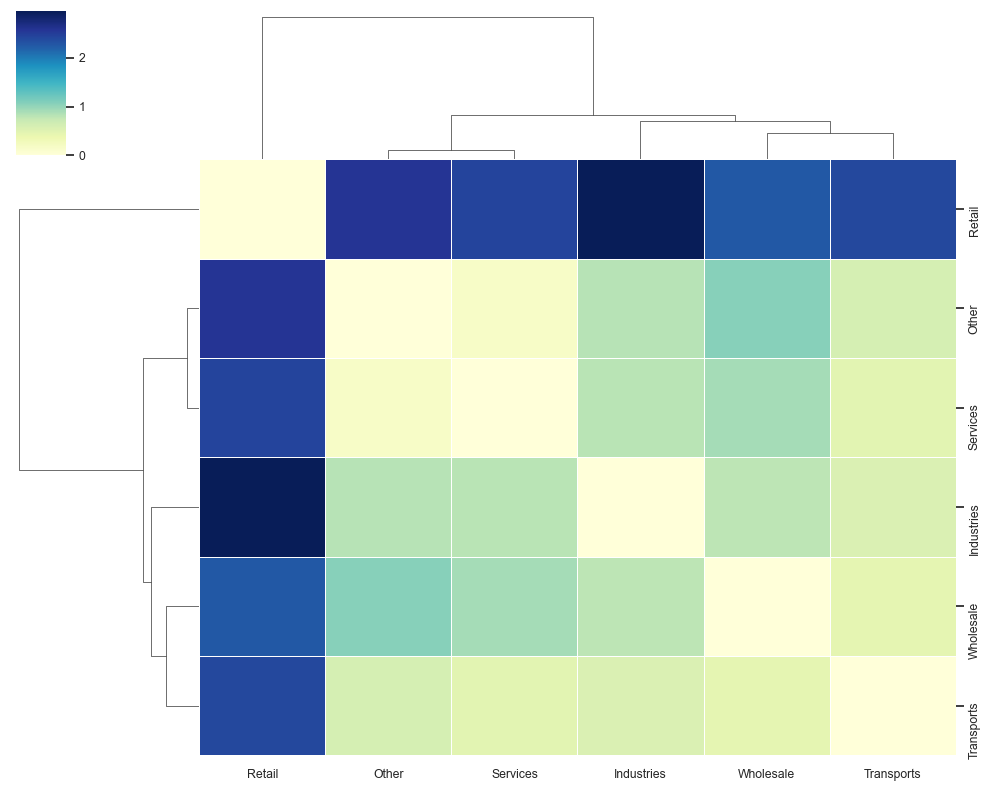

In [51]:
import pandas as pd
from geopy.distance import geodesic
from itertools import product
import seaborn as sns
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Get unique categories
categories = df['category_group'].unique()

# Initialize an empty distance matrix
distance_matrix = pd.DataFrame(index=categories, columns=categories)

# Loop through each pair of categories
for category1, category2 in product(categories, repeat=2):
    # Filter rows for the current categories
    category1_df = df[df['category_group'] == category1]
    category2_df = df[df['category_group'] == category2]
    
    # Calculate the centroid for each category
    centroid1_lon = category1_df['lon'].mean()
    centroid1_lat = category1_df['lat'].mean()
    
    centroid2_lon = category2_df['lon'].mean()
    centroid2_lat = category2_df['lat'].mean()
    
    # Calculate the distance between centroids using geodesic
    distance = geodesic((centroid1_lat, centroid1_lon), (centroid2_lat, centroid2_lon)).kilometers
    
    # Update the distance matrix
    distance_matrix.loc[category1, category2] = distance
    
# Convert the distance matrix to a numeric type
distance_matrix = distance_matrix.apply(pd.to_numeric, errors='coerce')

# Convert the distance matrix to a condensed form
condensed_distance = squareform(distance_matrix.values)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed_distance, method='average')

# Plot the dendrogram heatmap
sns.set(font_scale=0.8)
g = sns.clustermap(distance_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix, cmap="YlGnBu", linewidths=0.5, figsize=(10, 8))
plt.show()